In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_percentage_error

In [2]:
data = pd.read_csv('Used_Bikes.csv')
df = pd.DataFrame(data=data)
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [3]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [4]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [6]:
print(df.select_dtypes(include="object").columns)

Index(['bike_name', 'city', 'owner', 'brand'], dtype='object')


In [7]:
b_encoder = LabelEncoder()
bike_name = b_encoder.fit_transform(df['bike_name'])

In [8]:
bike_encoder = LabelEncoder()
df['bike_id'] = bike_encoder.fit_transform(df['bike_name'])
city_encoder = LabelEncoder()
df['city_id'] = city_encoder.fit_transform(df['city'])
brand_encoder = LabelEncoder()
df['brand_id'] = brand_encoder.fit_transform(df['brand'])

In [ ]:
# Define the mapping for replacement
replacement_dict = {
    'First Owner' : 1, 
    'Second Owner' : 2, 
    'Third Owner' : 3,
    'Fourth Owner Or More' : 4
}
# Replace multiple values in the 'Position' column
df['owner_level'] = df['owner'].replace(replacement_dict)

C:\Users\hardi\AppData\Local\Temp\ipykernel_16100\744727375.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['owner'] = df['owner'].replace(replacement_dict)


In [10]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand,bike_id,city_id,brand_id
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,1,3.0,110.0,TVS,401,6,19
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,1,4.0,350.0,Royal Enfield,295,118,17
2,Triumph Daytona 675R,600000.0,Delhi,110.0,1,8.0,675.0,Triumph,411,118,20
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,1,4.0,180.0,TVS,375,44,19
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,1,3.0,150.0,Yamaha,426,44,21


In [ ]:
dataset = df[['kms_driven','owner','age','power','bike_id','city_id','brand_id']]
dataset = dataset.values
dataset.shape

(32648, 7)

In [ ]:
price = df['price'].values
price.shape

(32648,)

In [ ]:
# Step 2: Build ANN Model
model = Sequential([
    Input(shape=(7,)),  # ✅ Correct way to define input shape
    Dense(21, activation='relu'),
    Dense(343, activation='relu'),
    Dense(2401, activation='relu'),
    Dense(343, activation='relu'),
    Dense(21, activation='relu'),
    Dense(1)  # Output layer (single value)
])

In [ ]:

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',          # Monitor validation loss
    patience=5,                  # Stop training if val_loss doesn't improve for 5 epochs
    restore_best_weights=True    # Restore the model with the best weights
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',      # Correct metric name
    patience=5,                  # Reduce learning rate after 5 epochs without improvement
    verbose=1,
    factor=0.3,                  # Reduce learning rate by half
    min_lr=0.0001               # Minimum learning rate
)

# Define the list of callbacks
callbacks = [early_stopping, learning_rate_reduction]
# Step 3: Compile Model
model.compile(optimizer='adam', loss='mse')

# Step 4: Train the Model
model.fit(dataset, price, epochs=50, batch_size=320, verbose=1,validation_split=0.35,callbacks=callbacks)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 12269958144.0000 - val_loss: 2557273344.0000 - learning_rate: 0.0010
Epoch 2/50
14/67 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 4943789568.0000

KeyboardInterrupt: 

In [ ]:

print("Predicted Value:", prediction[0][0])

Predicted Value: 125776.29


In [ ]:
prediction = model.predict(dataset)

1021/1021 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
mean_absolute_percentage_error(y_true=price,y_pred=prediction)

0.2776925910187424

In [ ]:
model.save('bikepredictor.keras')

In [12]:
loaded_model = keras.models.load_model("bikepredictor.keras")

In [18]:
kk=[11000.0,1,4.0,350,295,118,17]
# Step 5: Predict on New Data
new_data = np.array(kk).reshape(1, -1)  # Ensure shape (1,7)
prediction = loaded_model.predict(new_data)
prediction[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


125776.29

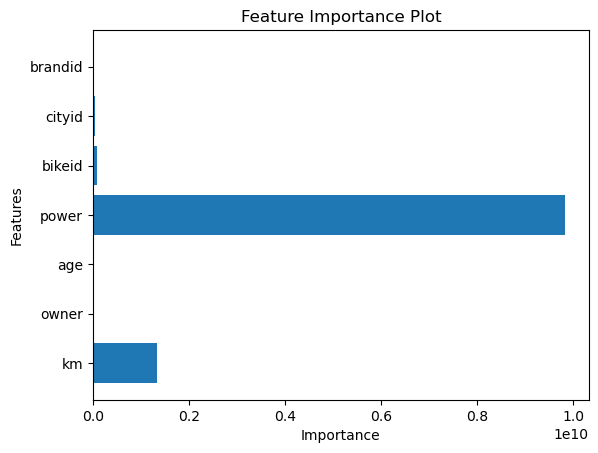

In [ ]:


importance_plot = {
    "km": 1337582803.40513,
    "owner": 74532.38454,
    "age": 17179191.82710,
    "power": 9837719771.22226,
    "bikeid": 93472204.67905,
    "cityid": 50973324.85646,
    "brandid": 764381.25994
}

# Extract data from the dictionary
features = list(importance_plot.keys())
importance_values = list(importance_plot.values())

# Create the horizontal bar plot
plt.barh(features, importance_values)  # Use plt.barh [3][6]

# Add labels and title
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")

# Display the plot
plt.show()

In [ ]:
number = 125776.29
import math
# Method 1: Using math.ceil (Rounds up to the nearest integer, then multiplies by 100)


Method 1 (math.ceil): 125800
